In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [2]:
from collections import Counter

In [6]:
df_time = pd.read_csv('./bin/10_16_time_result.csv')

In [4]:
df_time_dlcpar=df_time[['dlcparTime']]
df_time_reconcILSTime_recurssive=df_time[['reconcILSTime_recurssive']]

In [5]:
df_time_dlcpar.rename(columns={'dlcparTime': 'Values'}, inplace=True)
df_time_reconcILSTime_recurssive.rename(columns={'reconcILSTime_recurssive': 'Values'}, inplace=True)


/tmp/ipykernel_97604/3082989273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_dlcpar.rename(columns={'dlcparTime': 'Values'}, inplace=True)
/tmp/ipykernel_97604/3082989273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_reconcILSTime_recurssive.rename(columns={'reconcILSTime_recurssive': 'Values'}, inplace=True)


In [6]:
df_time =pd.DataFrame(np.log(df_time[['reconcILSTime_recurssive','dlcparTime']].to_numpy()),columns=['reconcILSTime_recurssive','dlcparTime'])

In [7]:
df_time=df_time[df_time.reconcILSTime_recurssive<4]

<AxesSubplot:xlabel='reconcILSTime_recurssive', ylabel='dlcparTime'>

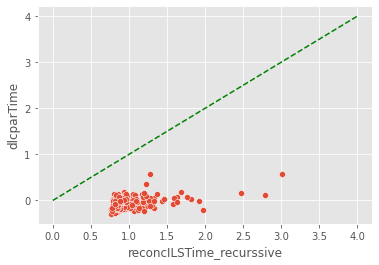

In [8]:

x = [0,4]
y = [0,4]

# Create the line
line = plt.plot(x, y, '--',color='g')

sns.scatterplot(data=df_time, x='reconcILSTime_recurssive', y='dlcparTime')


In [9]:
new_time=df_time_reconcILSTime_recurssive-df_time_dlcpar

In [10]:
new_time[['Values']]

,Values
0,1.458077
1,1.622394
2,1.324865
3,1.810855
4,1.352073
...,...
837,1.396198
838,1.534646
839,1.317182
840,1.350386


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


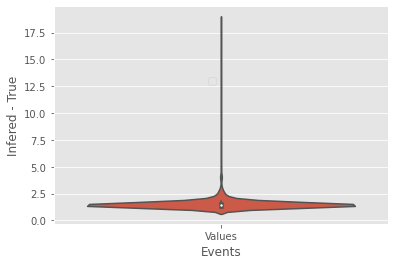

In [33]:

#ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
sns.violinplot(data=new_time[['Values']])

plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.5,0.7))
plt.ylabel("Infered - True")
plt.savefig('box_plot.jpg', dpi=500)
plt.savefig('small_vio.png')


In [237]:
pd1 = pd1.reset_index()

sns.displot(pd1, x="Time",hue='Process', bins=20)


NameError: name 'pd1' is not defined

In [244]:
df_time[['reconcILSTime_iterative','reconcILSTime_recurssive','dlcparTime']].mean()

NameError: name 'df_time' is not defined

<AxesSubplot:>

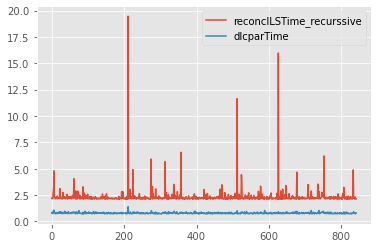

In [7]:
df_time[['reconcILSTime_recurssive','dlcparTime']].plot()

In [8]:
df_time[['reconcILSTime_recurssive','dlcparTime']].mean()

reconcILSTime_recurssive    2.352992
dlcparTime                  0.796992
dtype: float64

In [140]:
df_time[df_time.Replicate==830]['Gene_tree'].to_numpy()

array(['((((B,C),D),(((((D,D),((D,A),B)),(((B,C),A),A)),(A,D)),((A,C),((D,D),(B,((D,D),(C,A))))))),((E,E),(F,F)));'],
      dtype=object)

In [ ]:
df_diff_D = df_time[df_time['dlcparTime']<df_time['reconcILSTime']].fillna('')
df_diff_D

In [99]:
df_diff_D[(df_diff_D.reconcILSTime >100)]['Gene_tree']

Series([], Name: Gene_tree, dtype: object)

In [31]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
0,True Process,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
1,DLCpar,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
2,ETE3,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
3,reconcILS,0,"((C,B),A);","(A,(B,C));",0,0,0,0,0,0
4,True Process,1,"((B,C),A);","(A,(B,C));",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3363,reconcILS,998,"((C,B),A);","(A,(B,C));",0,0,0,0,0,0
3364,True Process,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0
3365,DLCpar,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0
3366,ETE3,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0


In [72]:
df = pd.read_csv('./bin/10_16_result.csv')
df_4 = pd.read_csv('./bin/10_16_result_1.csv')

In [37]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
0,True Process,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
1,DLCpar,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
2,ETE3,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
3,reconcILS,0,"((C,B),A);","(A,(B,C));",0,0,0,0,0,0
4,True Process,1,"((B,C),A);","(A,(B,C));",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3363,reconcILS,998,"(C,B);","(A,(B,C));",0,0,0,1,0,0
3364,True Process,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0
3365,DLCpar,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0
3366,ETE3,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0


In [38]:
df1= df[['Replicate','Gene_tree','Duplication','NNI','Loss']][(df.Process == 'reconcILS')]
df2=df_4[['Replicate','Gene_tree','Duplication','NNI','Loss']][(df_4.Process == 'Our_algorithm_recu')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df1.compare(df2).astype('category')

In [40]:
df2

Gene_tree                 Duplication        NNI       Loss  \
                     self           other        self other self other self   
Replicate                                                                     
0              ((C,B),A);      (A,(B,C));         NaN   NaN  NaN   NaN  NaN   
1              (A,(C,B));      ((B,C),A);         NaN   NaN  NaN   NaN  NaN   
3                  (C,B);          (B,C);         NaN   NaN  NaN   NaN  NaN   
4              ((B,C),A);      (A,(C,B));         NaN   NaN  NaN   NaN  NaN   
5              (A,(B,B));      ((B,B),A);         NaN   NaN  NaN   NaN  NaN   
...                   ...             ...         ...   ...  ...   ...  ...   
995                (A,C);          (C,A);         NaN   NaN  NaN   NaN  NaN   
996        (A,(C,(A,A)));  (((A,A),C),A);         NaN   NaN  NaN   NaN  NaN   
997                (B,A);          (A,B);         NaN   NaN  NaN   NaN  NaN   
998                (C,B);          (B,C);         NaN   NaN  NaN   NaN  NaN   
999            ((B,C),A);      (A,(C,B));         NaN   NaN  NaN   NaN  NaN   

                 
          other  
Replicate        
0           NaN  
1           NaN  
3           NaN  
4           NaN  
5           NaN  
...         ...  
995         NaN  
996         NaN  
997         NaN  
998         NaN  
999         NaN  

[809 rows x 8 columns]

In [42]:
df[df.Replicate==3]

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
12,True Process,3,"(B,C);","(A,(B,C));",0,0,0,1,0,1
13,DLCpar,3,"(B,C);","(A,(B,C));",0,0,0,0,0,0
14,ETE3,3,"(B,C);","(A,(B,C));",0,0,0,0,0,0
15,reconcILS,3,"(C,B);","(A,(B,C));",0,0,0,1,0,0


In [231]:
df[(df.Process=='True Process')].mean()

/tmp/ipykernel_22114/3112643074.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[(df.Process=='True Process')].mean()


Replicate      499.500
Duplication      0.777
NNI              0.381
DLCILS           0.381
Loss             0.000
Hemiplasy        0.000
RHemiplasy       0.000
dtype: float64

In [232]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
0,True Process,0,"((B,C),C);","(A,(B,C));",1,1,1,0,0,0
1,DLCpar,0,"((B,C),C);","(A,(B,C));",1,0,1,0,0,0
2,ETE3,0,"((B,C),C);","(A,(B,C));",1,0,0,1,0,0
3,Our_algorithm_ite,0,"((B,C),C);","(A,(B,C));",1,1,0,1,0,0
4,Our_algorithm_recu,0,"((B,C),C);","(A,(B,C));",1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,True Process,999,"(B,C);","(A,(B,C));",0,0,0,0,0,0
4996,DLCpar,999,"(B,C);","(A,(B,C));",0,0,0,0,0,0
4997,ETE3,999,"(B,C);","(A,(B,C));",0,0,0,0,0,0
4998,Our_algorithm_ite,999,"(B,C);","(A,(B,C));",0,0,0,1,0,0


In [85]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [86]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "reconcILS")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "reconcILS")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [87]:
dlc_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
dlc_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
dlc_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
dlc_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_dlc = pd.concat([dlc_Duplication,dlc_Loss],axis=1)

In [88]:
ete_Duplication = pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['Duplication'])
#ete_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ete_Loss = pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['Loss'])
#True_ete= pd.DataFrame(list(df[(df.Process == "ETE3")]['DLCILS']),columns=['DLCILS'])
concat_e = pd.concat([ete_Duplication,ete_Loss],axis=1)

#### concat_true_e

In [89]:
print(len(True_Duplication))

842


In [90]:
print(len(O_Duplication))

842


In [91]:
print(len(concat_dlc))

842


In [92]:
True_Duplication['Replicate']=[i for i in range(842)]
O_Duplication['Replicate']=[i for i in range(842)]
dlc_Duplication['Replicate']=[i for i in range(842)]
ete_Duplication['Replicate']=[i for i in range(842)]


In [93]:
pd.DataFrame((concat_true_e-concat_true))

NameError: name 'concat_true_e' is not defined

In [94]:
true_reconils_dups= pd.DataFrame(concat_O-concat_true)
val =['reconcILS' for i in range(842)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [95]:
true_dlc_dups= pd.DataFrame((concat_dlc-concat_true))
val =['DLCpar' for i in range(842)]
true_dlc_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [96]:
true_ete_dups= pd.DataFrame((concat_e-concat_true))
val =['ete3' for i in range(842)]
true_ete_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [97]:
true_ete_dups

,Duplication,Loss,Algorithm
0,0,0,ete3
1,0,0,ete3
2,0,-2,ete3
3,0,-1,ete3
4,-1,-1,ete3
...,...,...,...
837,0,0,ete3
838,0,2,ete3
839,0,0,ete3
840,0,-1,ete3


In [98]:
true_ete3_dups

NameError: name 'true_ete3_dups' is not defined

In [99]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [100]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
0,True Process,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
1,DLCpar,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
2,ETE3,0,"(A,(B,C));","(A,(B,C));",0,0,0,0,0,0
3,reconcILS,0,"((C,B),A);","(A,(B,C));",0,0,0,0,0,0
4,True Process,1,"((B,C),A);","(A,(B,C));",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3363,reconcILS,998,"(C,B);","(A,(B,C));",0,0,0,1,0,0
3364,True Process,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0
3365,DLCpar,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0
3366,ETE3,999,"(A,(C,B));","(A,(B,C));",0,0,0,0,0,0


In [101]:
[true_reconils_dups,true_dlc_dups,true_dlc_dups]

[     Duplication  Loss  Algorithm
 0              0     0  reconcILS
 1              0     0  reconcILS
 2              0    -1  reconcILS
 3              0     0  reconcILS
 4             -1    -1  reconcILS
 ..           ...   ...        ...
 837            0     0  reconcILS
 838            0     0  reconcILS
 839            0     0  reconcILS
 840            0     0  reconcILS
 841            0     0  reconcILS
 
 [842 rows x 3 columns],
      Duplication  Loss Algorithm
 0              0     0    DLCpar
 1              0     0    DLCpar
 2              0    -2    DLCpar
 3              0    -1    DLCpar
 4             -1    -1    DLCpar
 ..           ...   ...       ...
 837            0     0    DLCpar
 838            0     1    DLCpar
 839            0     0    DLCpar
 840            0    -1    DLCpar
 841            0     0    DLCpar
 
 [842 rows x 3 columns],
      Duplication  Loss Algorithm
 0              0     0    DLCpar
 1              0     0    DLCpar
 2              

In [102]:
new =pd.concat([true_reconils_dups,true_dlc_dups,true_ete_dups],axis=0)
new

,Duplication,Loss,Algorithm
0,0,0,reconcILS
1,0,0,reconcILS
2,0,-1,reconcILS
3,0,0,reconcILS
4,-1,-1,reconcILS
...,...,...,...
837,0,0,ete3
838,0,2,ete3
839,0,0,ete3
840,0,-1,ete3


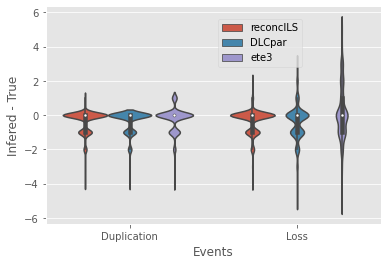

In [103]:
#ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
sns.violinplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))

plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.5,0.7))
plt.ylabel("Infered - True")
plt.savefig('box_plot.jpg', dpi=500)
plt.savefig('small_vio.png')


In [104]:
df1

,Gene_tree,Duplication,NNI,Loss
Replicate,,,,
0,"((C,B),A);",0,0,0
1,"(A,(C,B));",0,0,0
2,"(A,A);",1,0,1
3,"(C,B);",0,0,1
4,"((B,C),A);",0,0,0
...,...,...,...,...
995,"(A,C);",0,0,1
996,"(A,(C,(A,A)));",2,1,1
997,"(B,A);",0,0,1


In [105]:
df[['Replicate','Process','Duplication']][(df.Process == 'Our_algorithm')]

,Replicate,Process,Duplication


In [106]:
df[(df.Process == 'DLCpar')][['Replicate','Duplication']].jp(df[(df.Process == 'Our_algorithm_recu')][['Replicate','Duplication']]

SyntaxError: unexpected EOF while parsing (2446934301.py, line 1)

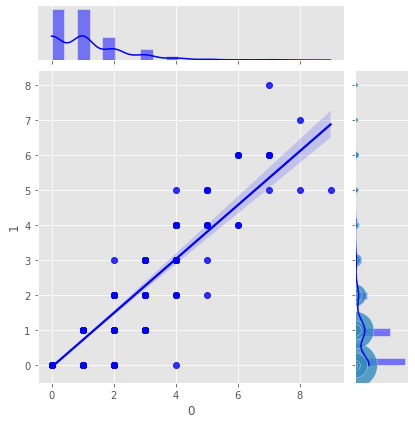

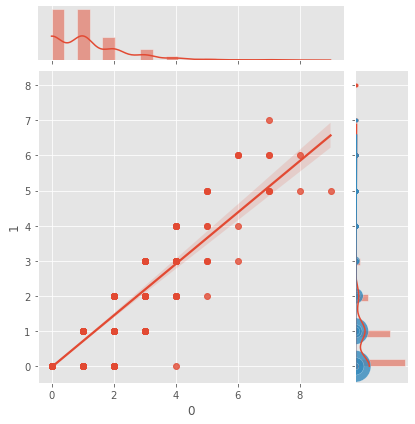

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd

result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_Duplication['Duplication'],dlc_Duplication['Duplication']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.jointplot(data=result1, x=0, y=1, kind='reg',color='Blue')
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)

sns.jointplot(data=result12, x=0, y=1, kind='reg')

sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



# Show the plot
plt.show()

In [108]:
result1

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
...,...,...
837,0,0
838,2,2
839,0,0
840,0,0


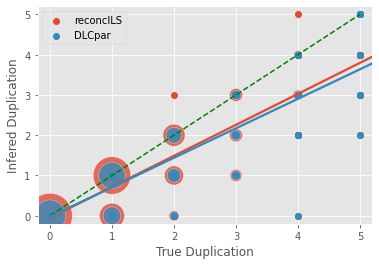

<Figure size 432x288 with 0 Axes>

In [109]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_Duplication['Duplication'],dlc_Duplication['Duplication']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')

sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(20, 1000), alpha=0.8)

# show the graph

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker="o", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker="o",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')




plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups_small.png', dpi=500)

plt.show()
plt.clf()

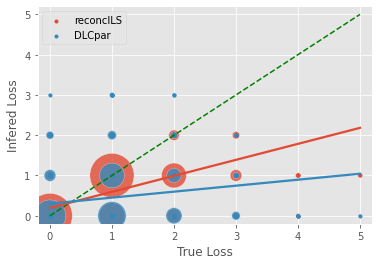

<Figure size 432x288 with 0 Axes>

In [110]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],dlc_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')
ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss_small.png', dpi=500)

plt.show()
plt.clf()

In [167]:
r =result1.astype('category')

In [102]:
r

,0,1
0,0,0
1,2,2
2,0,0
3,1,1
4,0,0
...,...,...
815,0,0
816,0,0
817,3,0
818,1,1


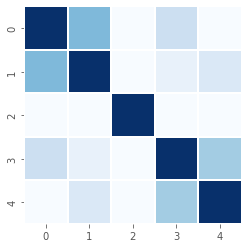

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [104]:
np.array([list(result1[0]), list(result1[1])])

array([[0, 2, 0, ..., 3, 1, 0],
       [0, 2, 0, ..., 0, 1, 0]])

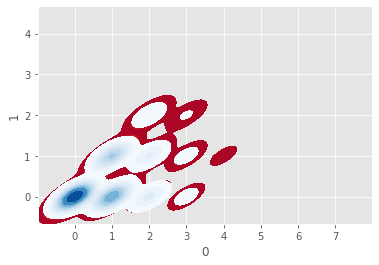

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
import pandas as pd


result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
# Create a jittered scatter plot using sns.stripplot
sns.kdeplot(x=result1[0], y=result1[1], cmap='RdYlBu', fill=True)
result12 =pd.concat([True_DLCILS['DLCILS'],dlc_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
sns.kdeplot(x=result12[0], y=result12[1], cmap='Blues', fill=True)
# Show the plot
plt.show()

In [59]:
result11

,0,1,Count
0,0,0,384
1,1,0,129
2,1,1,156
3,1,2,2
4,2,0,18
5,2,1,50
6,2,2,37
7,3,0,12
8,3,1,15
9,3,2,15


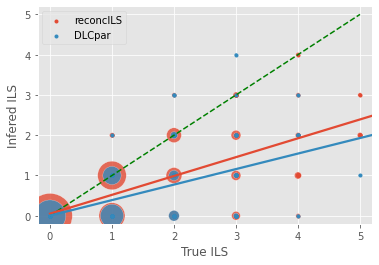

<Figure size 432x288 with 0 Axes>

In [112]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],dlc_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True ILS")
plt.ylabel("Infered ILS")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI_small.png', dpi=500)

plt.show()
plt.clf()

In [169]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

NameError: name 'ETE3_Loss' is not defined

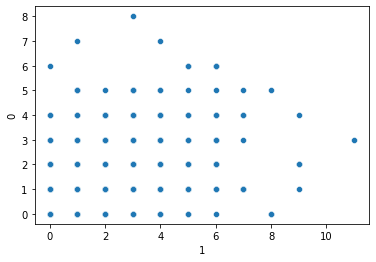

In [224]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [113]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [114]:
rho

0.25656136930183526

In [116]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Loss']),columns=['NNI']))

In [117]:
rho

0.6459620561337565

In [118]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [119]:
rho

0.8489081566183768

In [121]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['NNI']))

In [123]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['Duplication']),columns=['NNI']))

In [124]:
rho

0.84999077282007

In [125]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

In [126]:
rho

0.5629909939310334

In [127]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "reconcILS")]['NNI']),columns=['NNI']))

In [128]:
rho

0.7228508654153806